# Dataset Overview

This dataset contains anonymized health records of 68,205 patients, covering variables such as age, gender, BMI, blood pressure, cholesterol levels, glucose levels, smoking status, alcohol consumption, physical activity, and the presence of cardiovascular disease.

The objective is to understand the structure and quality of the data, identify potential issues such as missing values and outliers, and uncover patterns relevant to predicting cardiovascular health risks.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df=pd.read_csv("cardio_data_processed.csv", delimiter='\t')

In [5]:
df = df.iloc[:, 0].str.split(',', expand=True)
df.columns = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
              'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 
              'age_years', 'bmi', 'bp_category', 'bp_category_encoded']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   68205 non-null  object
 1   age                  68205 non-null  object
 2   gender               68205 non-null  object
 3   height               68205 non-null  object
 4   weight               68205 non-null  object
 5   ap_hi                68205 non-null  object
 6   ap_lo                68205 non-null  object
 7   cholesterol          68205 non-null  object
 8   gluc                 68205 non-null  object
 9   smoke                68205 non-null  object
 10  alco                 68205 non-null  object
 11  active               68205 non-null  object
 12  cardio               68205 non-null  object
 13  age_years            68205 non-null  object
 14  bmi                  68205 non-null  object
 15  bp_category          68205 non-null  object
 16  bp_c

In [7]:
# number of rows and coulmns
df.shape

(68205, 17)

In [8]:
pd.DataFrame(df.isnull().mean()*100, columns=['% null values']).sort_values(by='% null values', ascending=False)

,% null values
id,0.0
smoke,0.0
bp_category,0.0
bmi,0.0
age_years,0.0
cardio,0.0
active,0.0
alco,0.0
gluc,0.0
age,0.0


In [9]:
df.duplicated().sum()

0

In [10]:
# drop for unnecessary columns
df.drop(['id','age'], axis= 1, inplace = True)

In [11]:
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)
df['ap_hi'] = df['ap_hi'].astype(int)
df['ap_lo'] = df['ap_lo'].astype(int)
df['age_years'] = df['age_years'].astype(int)
df['bmi'] = df['bmi'].astype(float)


In [12]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,height,weight,ap_hi,ap_lo,age_years,bmi
count,68205.00,68205.00,68205.00,68205.00,68205.00,68205.00
mean,164.37,74.10,126.43,81.26,52.82,27.51
std,8.18,14.29,15.96,9.14,6.77,6.03
min,55.00,11.00,90.00,60.00,29.00,3.47
25%,159.00,65.00,120.00,80.00,48.00,23.88
50%,165.00,72.00,120.00,80.00,53.00,26.35
75%,170.00,82.00,140.00,90.00,58.00,30.12
max,250.00,200.00,180.00,120.00,64.00,298.67


In [13]:
df.describe(include='object')

,gender,cholesterol,gluc,smoke,alco,active,cardio,bp_category,bp_category_encoded
count,68205,68205,68205,68205,68205,68205,68205,68205,68205
unique,2,3,3,2,2,2,2,4,4
top,1,1,1,0,0,1,0,Hypertension Stage 1,Hypertension Stage 1
freq,44427,51222,58027,62226,64581,54806,34533,39750,39750


# Data Cleaning

In [14]:
cols_to_fix = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi']
for col in cols_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [15]:
df[cols_to_fix].dtypes

gender           int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
age_years        int32
bmi            float64
dtype: object

## Height Feature

In [16]:
print(df['height'].describe())

count   68205.00
mean      164.37
std         8.18
min        55.00
25%       159.00
50%       165.00
75%       170.00
max       250.00
Name: height, dtype: float64


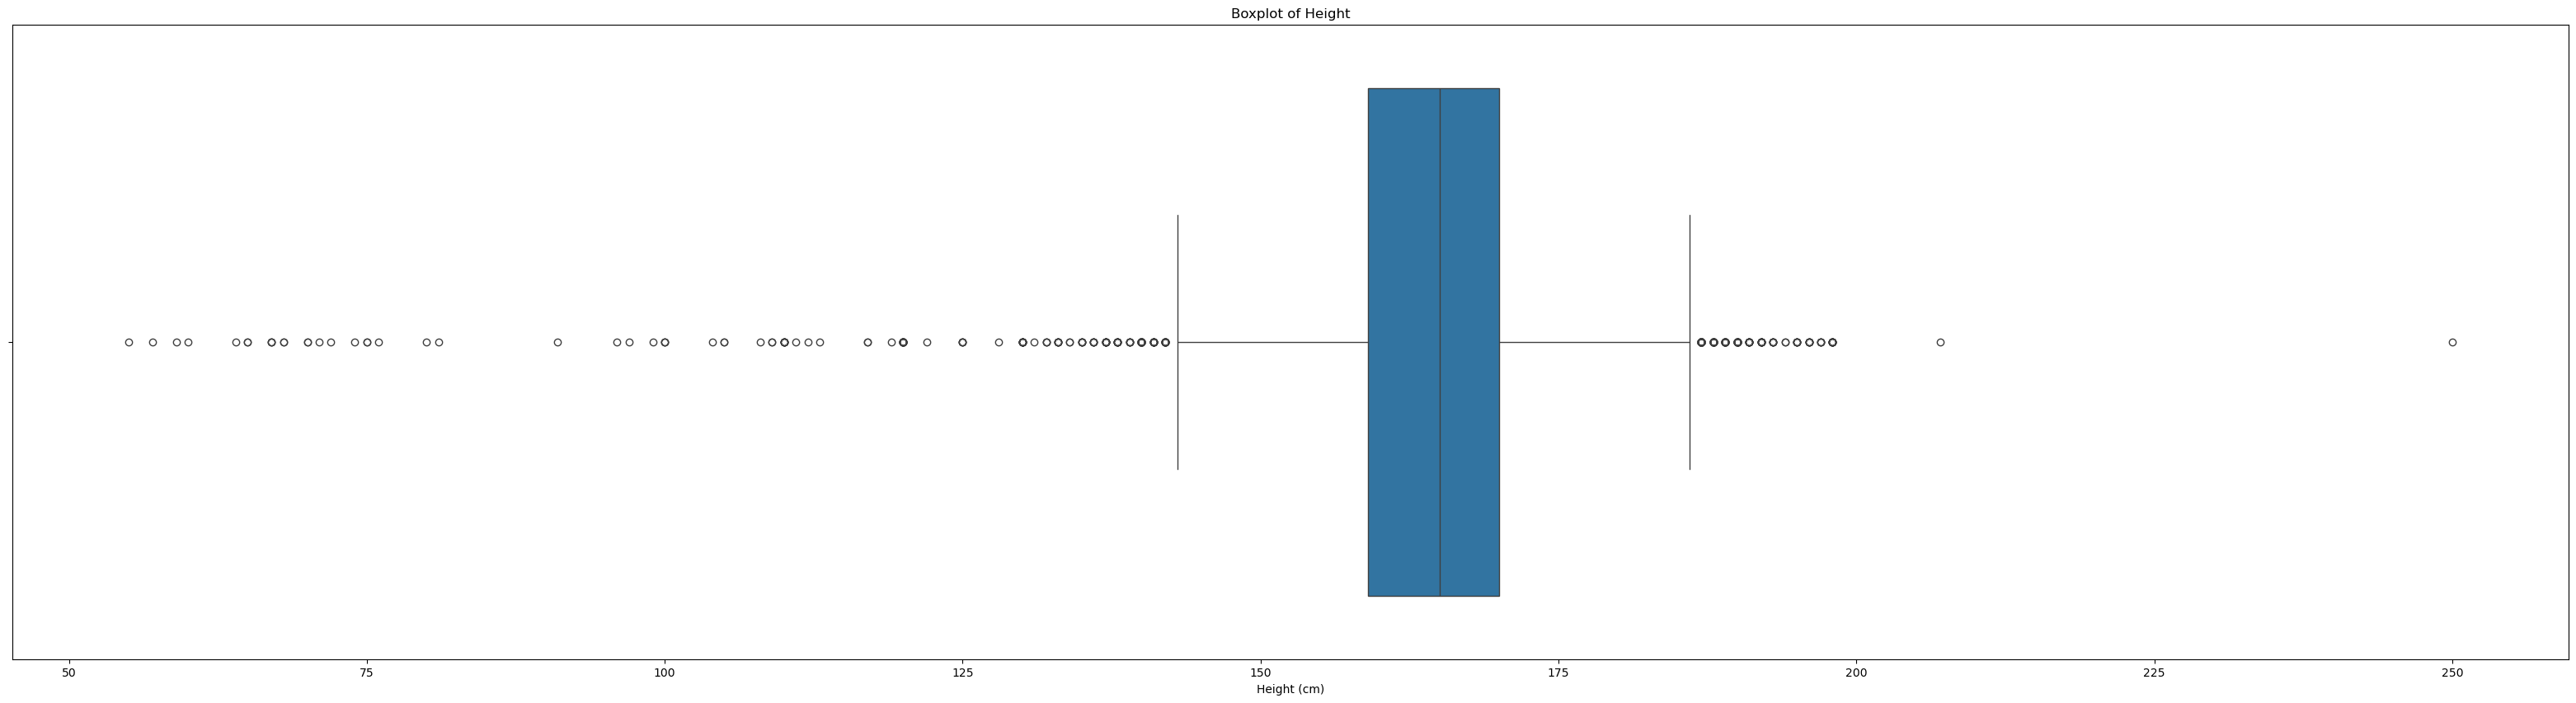

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.boxplot(x=df['height'])
plt.title('Boxplot of Height')
plt.xlabel('Height (cm)')
plt.show()

In [18]:
print("Min height:", df['height'].min())
print("Max height:", df['height'].max())

Min height: 55.0
Max height: 250.0


### Replace the erroneous outliers with the median heights

In [19]:
median_height = df[(df['height'] >= 120) & (df['height'] <= 210)]['height'].median()
df.loc[(df['height'] < 120) | (df['height'] > 210), 'height'] = median_height

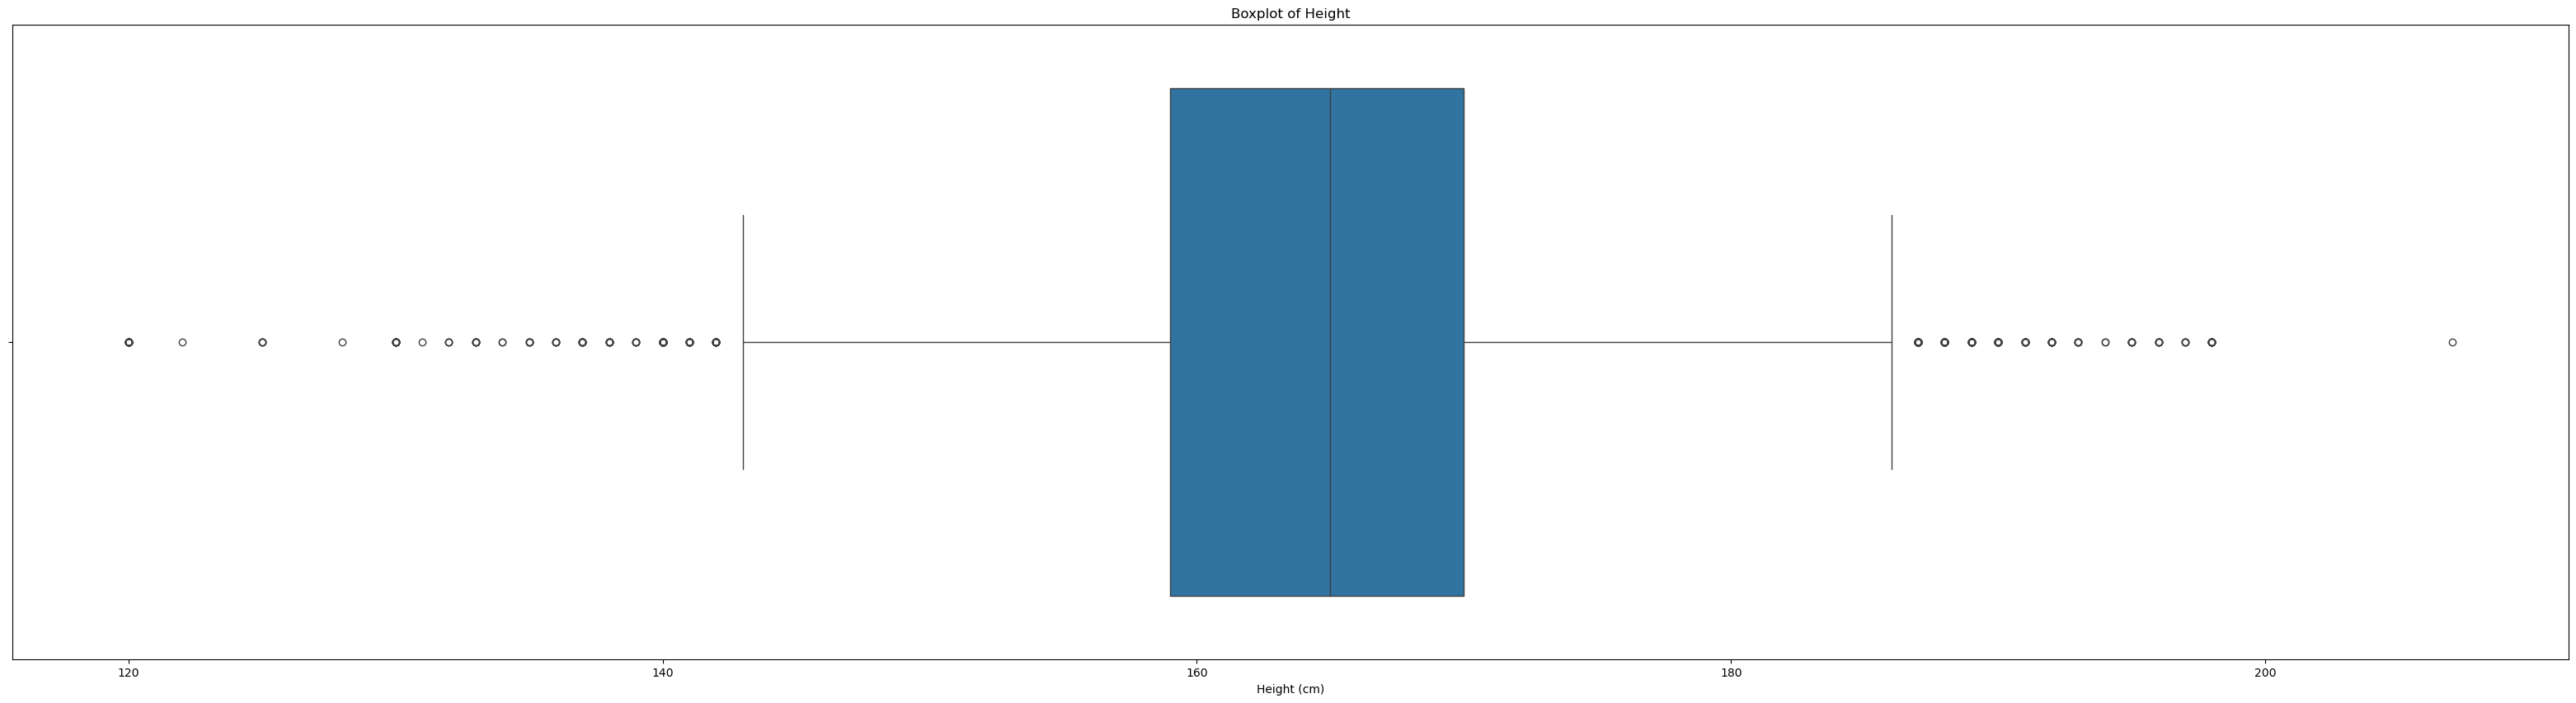

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10))
sns.boxplot(x=df['height'])
plt.title('Boxplot of Height')
plt.xlabel('Height (cm)')
plt.show()

## Weight Feature

In [21]:
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df = df.dropna(subset=['weight'])

In [22]:
outliers_weight = df[(df['weight'] < 30) | (df['weight'] > 300)]
print(f"Number of Outliers in weight: {len(outliers_weight)}")
display(outliers_weight[['weight']])


Number of Outliers in weight: 6


,weight
26119,23.00
28724,22.00
32945,11.00
33391,28.00
58644,21.00
59138,29.00


In [23]:
median_weight = df[(df['weight'] > 30)]['weight'].median()
df.loc[(df['weight'] < 30), 'weight'] = median_weight

## Ap_hi & Ap_lo Features

In [24]:
df['ap_hi'] = pd.to_numeric(df['ap_hi'], errors='coerce')
df = df.dropna(subset=['ap_hi'])
df['ap_lo'] = pd.to_numeric(df['ap_lo'], errors='coerce')
df = df.dropna(subset=['ap_lo'])

In [25]:
df[(df['ap_hi'] < df['ap_lo']) | (df['ap_hi'] < 50) | (df['ap_lo'] < 30)]

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
22303,2,178.00,84.00,95,100,1,1,0,1,0,1,56,26.51,Hypertension Stage 2,Hypertension Stage 2
45316,2,178.00,92.00,90,100,1,1,1,0,1,0,41,29.04,Hypertension Stage 2,Hypertension Stage 2
51424,1,164.00,86.00,90,120,1,1,0,1,1,1,57,31.98,Hypertension Stage 2,Hypertension Stage 2


### Swap values if it was a flip mistake

In [26]:
df.loc[df['ap_lo'] > df['ap_hi'], ['ap_hi', 'ap_lo']] = df.loc[df['ap_lo'] > df['ap_hi'], ['ap_lo', 'ap_hi']].values

In [27]:
df[(df['ap_hi'] < df['ap_lo']) | (df['ap_hi'] < 50) | (df['ap_lo'] < 30)]

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded


## bp_category and bp_category_encoded Features

In [28]:
# mapping from category to encoded value
category_to_code = df[['bp_category', 'bp_category_encoded']].drop_duplicates()
# Check how many unique mappings exist
print("Unique category-to-code mappings:")
print(category_to_code)


Unique category-to-code mappings:
             bp_category   bp_category_encoded
0   Hypertension Stage 1  Hypertension Stage 1
1   Hypertension Stage 2  Hypertension Stage 2
4                 Normal                Normal
19              Elevated              Elevated


In [29]:
# Now, verify that each bp_category always maps to the same encoded value
mapping_valid = df.groupby('bp_category')['bp_category_encoded'].nunique()
# If all values are 1, it means every category maps to exactly one code
print("\nCheck if each category has one unique code:")
print(mapping_valid)
if all(mapping_valid == 1):
    print("\n✅ All bp_category values are consistently encoded in bp_category_encoded.")
else:
    print("\n❌ There are inconsistencies in the encoding.")


Check if each category has one unique code:
bp_category
Elevated                1
Hypertension Stage 1    1
Hypertension Stage 2    1
Normal                  1
Name: bp_category_encoded, dtype: int64

✅ All bp_category values are consistently encoded in bp_category_encoded.


In [30]:
bp_counts = df['bp_category'].value_counts()
print("Number of appearans of each categoy at bp_category:")
print(bp_counts)
print("\nThe most repeated Catigory:", bp_counts.idxmax())
print(bp_counts.idxmax(), "'%' from the total data: {:.2f}%".format((bp_counts.max() / len(df)) * 100))

Number of appearans of each categoy at bp_category:
bp_category
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64

The most repeated Catigory: Hypertension Stage 1
Hypertension Stage 1 '%' from the total data: 58.28%


In [31]:
df.describe(include='object')

,bp_category,bp_category_encoded
count,68205,68205
unique,4,4
top,Hypertension Stage 1,Hypertension Stage 1
freq,39750,39750


In [32]:
df.drop(['bp_category_encoded'], axis= 1, inplace = True)

# Feature engineering

In [33]:
# Pulse Pressure
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

In [34]:
# Obesity
df['is_obese'] = (df['bmi'] >= 30).astype(int)

In [35]:
# lifestyle_score
df['lifestyle_score'] = df['smoke'] + df['alco'] + (1 - df['active'])


In [36]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [37]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,pulse_pressure,is_obese,lifestyle_score,bmi_category
0,2,168.00,62.00,110,80,1,1,0,0,1,0,50,21.97,Hypertension Stage 1,30,0,0,Normal
1,1,156.00,85.00,140,90,3,1,0,0,1,1,55,34.93,Hypertension Stage 2,50,1,0,Obese
2,1,165.00,64.00,130,70,3,1,0,0,0,1,51,23.51,Hypertension Stage 1,60,0,1,Normal
3,2,169.00,82.00,150,100,1,1,0,0,1,1,48,28.71,Hypertension Stage 2,50,0,0,Overweight
4,1,156.00,56.00,100,60,1,1,0,0,0,0,47,23.01,Normal,40,0,1,Normal


# Saving Of Data

In [38]:
df.to_csv('cleaned_data.csv', index=False)